Data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Example to follow:
https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from statistics import median, mean
from sklearn import metrics

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df2 = df.copy()

In [6]:
for i in df.columns:
  print(df[i].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [7]:
for i in df2.columns:
  if (df2[i].dtypes == 'object') and (df2[i].nunique() == 2) and ('Yes' in df2[i].values):
    for j in range(df2[i].shape[0]):
      if df2[i][j] == "No":
        n = 0
        df2[i][j] = n
      elif df2[i][j] =='Yes':
        n = 1
        df2[i][j] = n
      else:
        continue
    df2[i] = df2[i].astype(dtype='int64')

# categorical_column = {'No' : 0, 'Yes' : 1}
# df2[i] = df2[i].map(categorical_column)


<ipython-input-7-2b8ea85bc21d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i][j] = n
<ipython-input-7-2b8ea85bc21d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i][j] = n


In [8]:
df2 = pd.get_dummies(df2, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

In [9]:
df2['gender'][1]

'Male'

In [10]:
df2.isnull().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

In [11]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   object 
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   object 
 10  Churn                                    7043 no

In [13]:
df2['Partner'].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

In [14]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [15]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Os dados estão desbalanceados

In [16]:
df2.loc[df2['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,4472-LVYGI,Female,0,1,1,0,0,1,52.55,,...,1,0,0,0,0,1,1,0,0,0
753,3115-CZMZD,Male,0,0,1,0,1,0,20.25,,...,0,1,0,0,0,1,0,0,0,1
936,5709-LVOEQ,Female,0,1,1,0,1,0,80.85,,...,0,0,1,0,0,1,0,0,0,1
1082,4367-NUYAO,Male,0,1,1,0,1,0,25.75,,...,0,1,0,0,0,1,0,0,0,1
1340,1371-DWPAZ,Female,0,1,1,0,0,0,56.05,,...,1,0,0,0,0,1,0,1,0,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,19.85,,...,0,1,0,0,0,1,0,0,0,1
3826,3213-VVOLG,Male,0,1,1,0,1,0,25.35,,...,0,1,0,0,0,1,0,0,0,1
4380,2520-SGTTA,Female,0,1,1,0,1,0,20.00,,...,0,1,0,0,0,1,0,0,0,1
5218,2923-ARZLG,Male,0,1,1,0,1,1,19.70,,...,0,1,0,0,1,0,0,0,0,1
6670,4075-WKNIU,Female,0,1,1,0,1,0,73.35,,...,1,0,0,0,0,1,0,0,0,1


In [17]:
df2['TotalCharges'] = df2['TotalCharges'].replace(' ', np.nan)

O tratamento dos valores ausentes será realizado após a análise de dados devido ao tratamento selecionado, estes valores ausentes serão tratados com a mediana do conjunto, portanto, será imputada apenas as medianas da divisão dos dados de treino para que não haja vazamento de dados. Tendo isto em vista, este tratamento será realizado após a divisão dos dados em treino e teste.

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   object 
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7032 non-null   object 
 10  Churn                                    7043 no

<ipython-input-19-e942edd91c8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

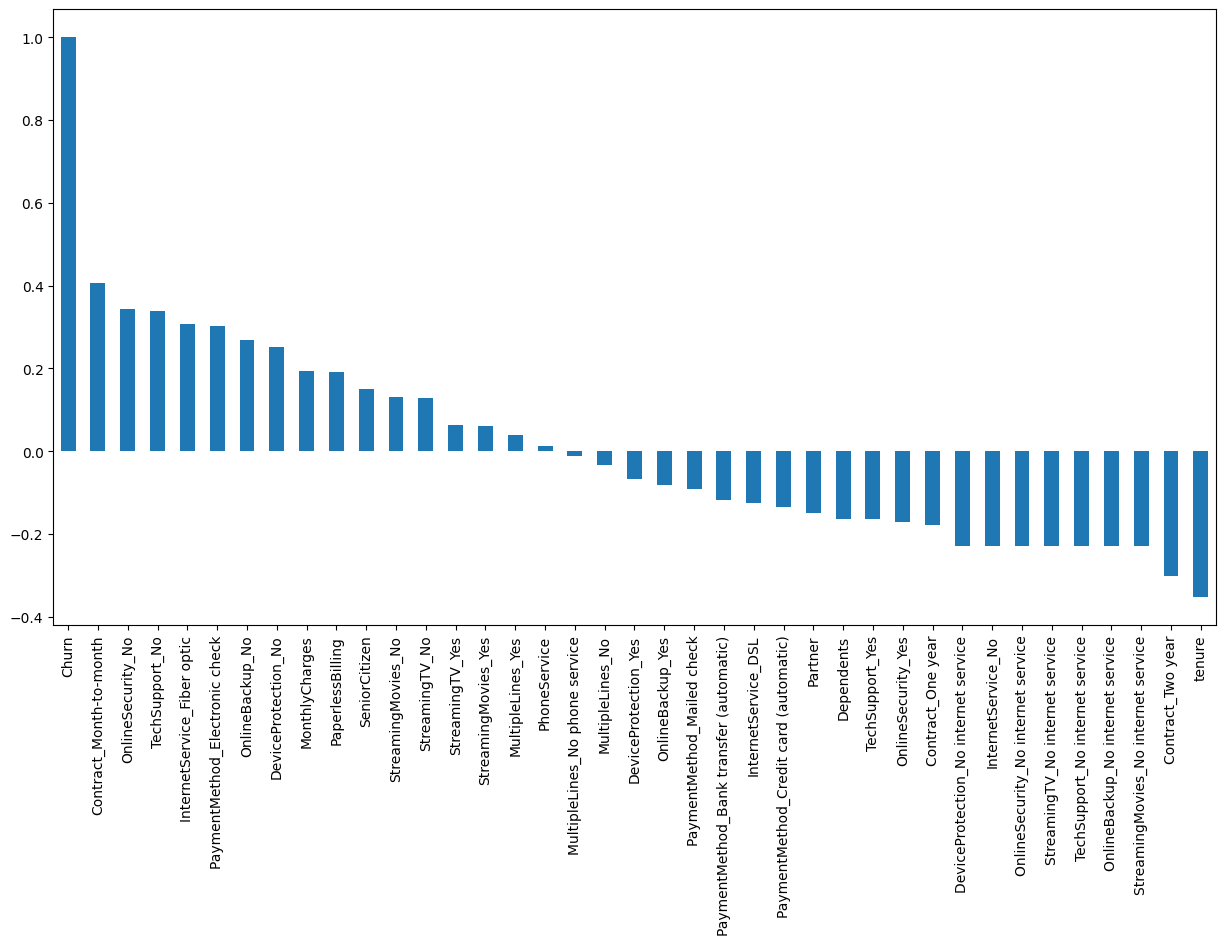

In [19]:
plt.figure(figsize=(15,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

[Contract_Month-to-Month, OnlineSecurity_No, Techsupport_No, InternetService_Fiber Optic, PaymentMethod_Electronic Check] it seems to be positively correlated

Tenure, Contract_Two year are negatively correlated

Apparently, OnlineSecurity, Streaming TV, online support and tech tv are negatively related to churn

Gender - About a half of the dataset is male while the other half is female

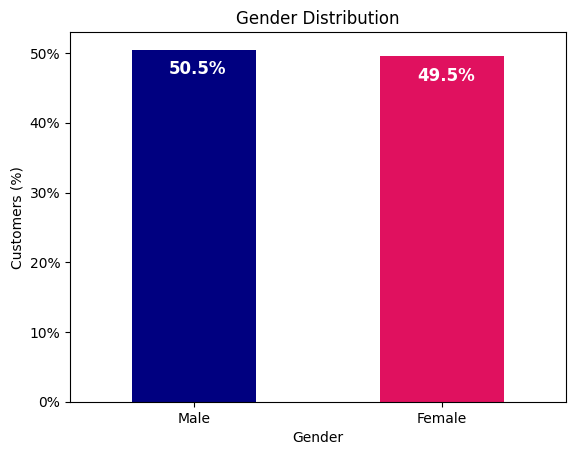

In [20]:
c = ['#000080', '#E0115F']

axis = (df2['gender'].value_counts() * 100 / df2.shape[0]).plot(kind='bar', stacked=True, rot=0, color = c)

axis.yaxis.set_major_formatter(mtick.PercentFormatter())
axis.set_ylabel('Customers (%)')
axis.set_xlabel('Gender')
axis.set_title('Gender Distribution')

totals = []

for i in axis.patches:
  totals.append(i.get_width())

total = sum(totals)

for i in axis.patches:
  axis.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

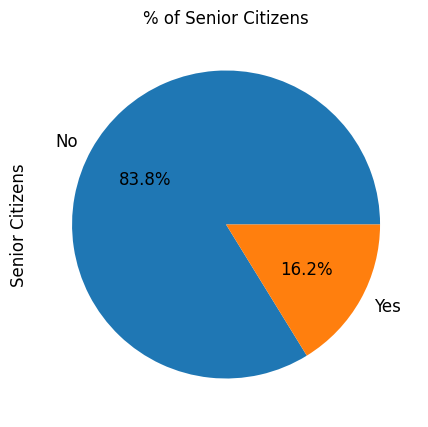

In [21]:
axis = (df2['SeniorCitizen'].value_counts()*100.0 /df2.shape[0]).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )

axis.yaxis.set_major_formatter(mtick.PercentFormatter())
axis.set_ylabel('Senior Citizens',fontsize = 12)
axis.set_title('% of Senior Citizens', fontsize = 12)

Only 16% of the customers are senior citizens. Then, most of the customers are younger people.

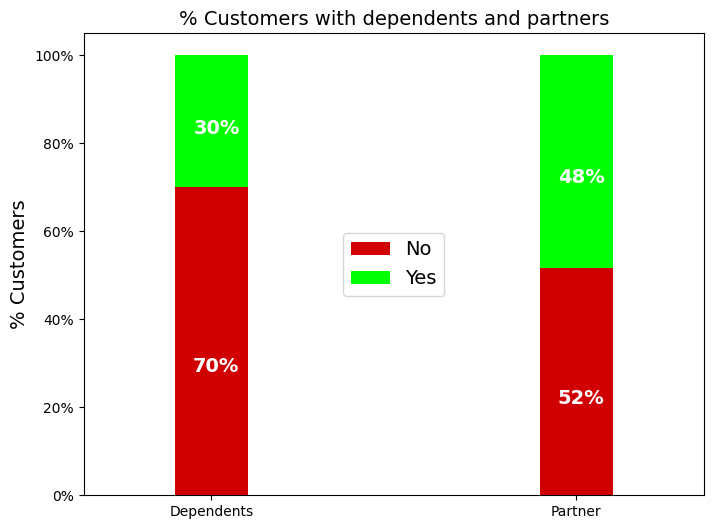

In [22]:
df2_grouped = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df2_grouped2 = df2_grouped.groupby(['variable','value']).count().unstack()
df2_grouped2 = df2_grouped2*100/len(df)
colors = ['#D10000','#00FF00']
ax = df2_grouped2.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

50% of the customers have a partner, while only 30% of the total customers have dependents

<ipython-input-23-d4b5ccf9f196>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

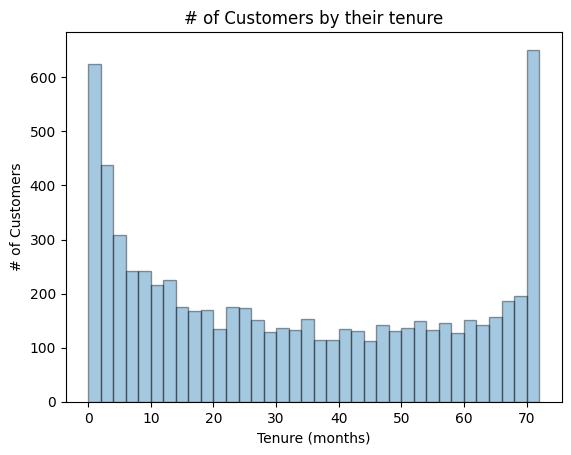

In [23]:
ax = sns.distplot(df['tenure'], hist=True, kde=False,
             bins=int(180/5),
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

A lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months.

Text(0.5, 1.0, '# of Customers by Contract Type')

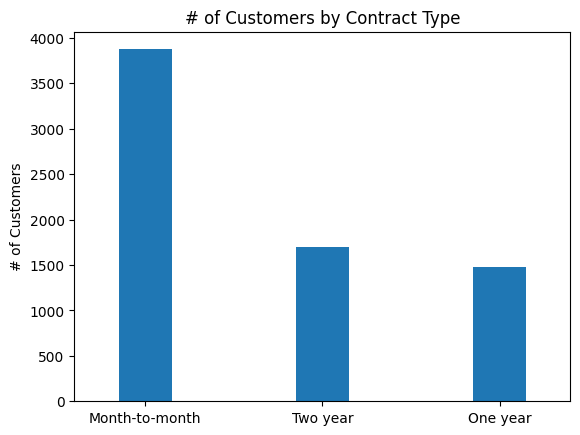

In [24]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

<ipython-input-25-8a3d249b7422>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
<ipython-input-25-8a3d249b7422>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
<ipython-input-25-8a3d249b7422>:2

Text(0.5, 1.0, 'Two Year Contract')

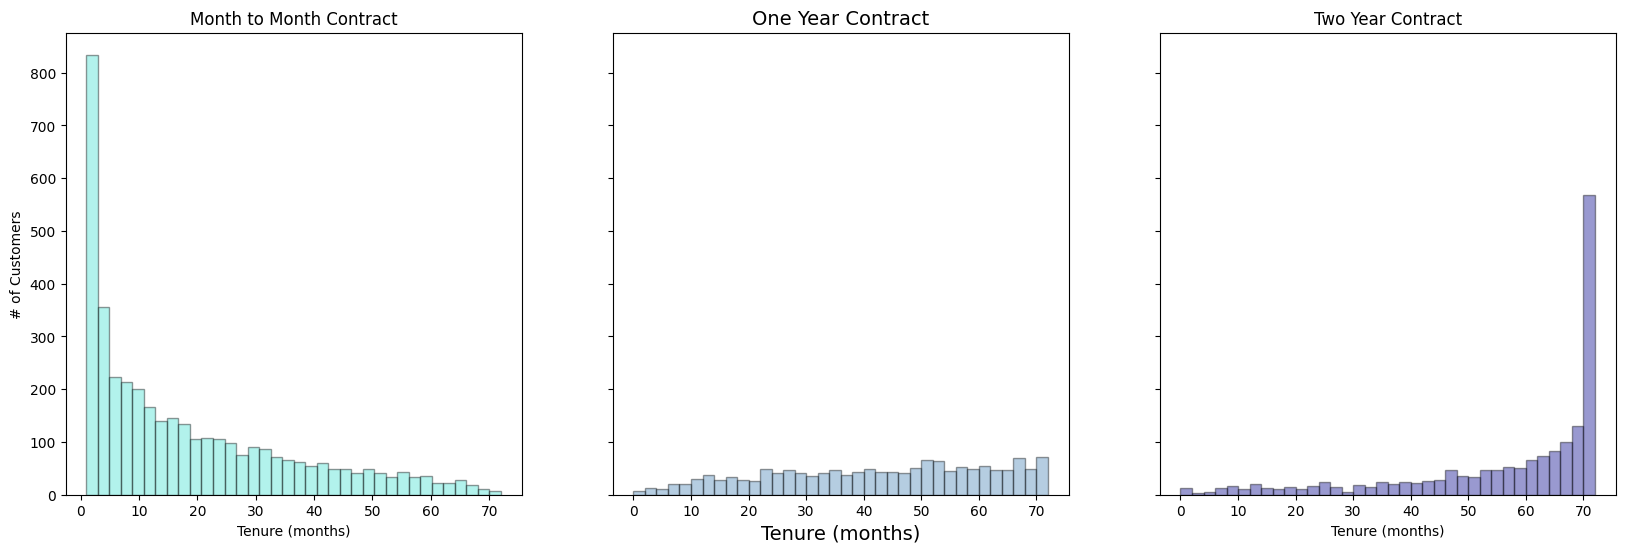

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

distribution of various services used by customers

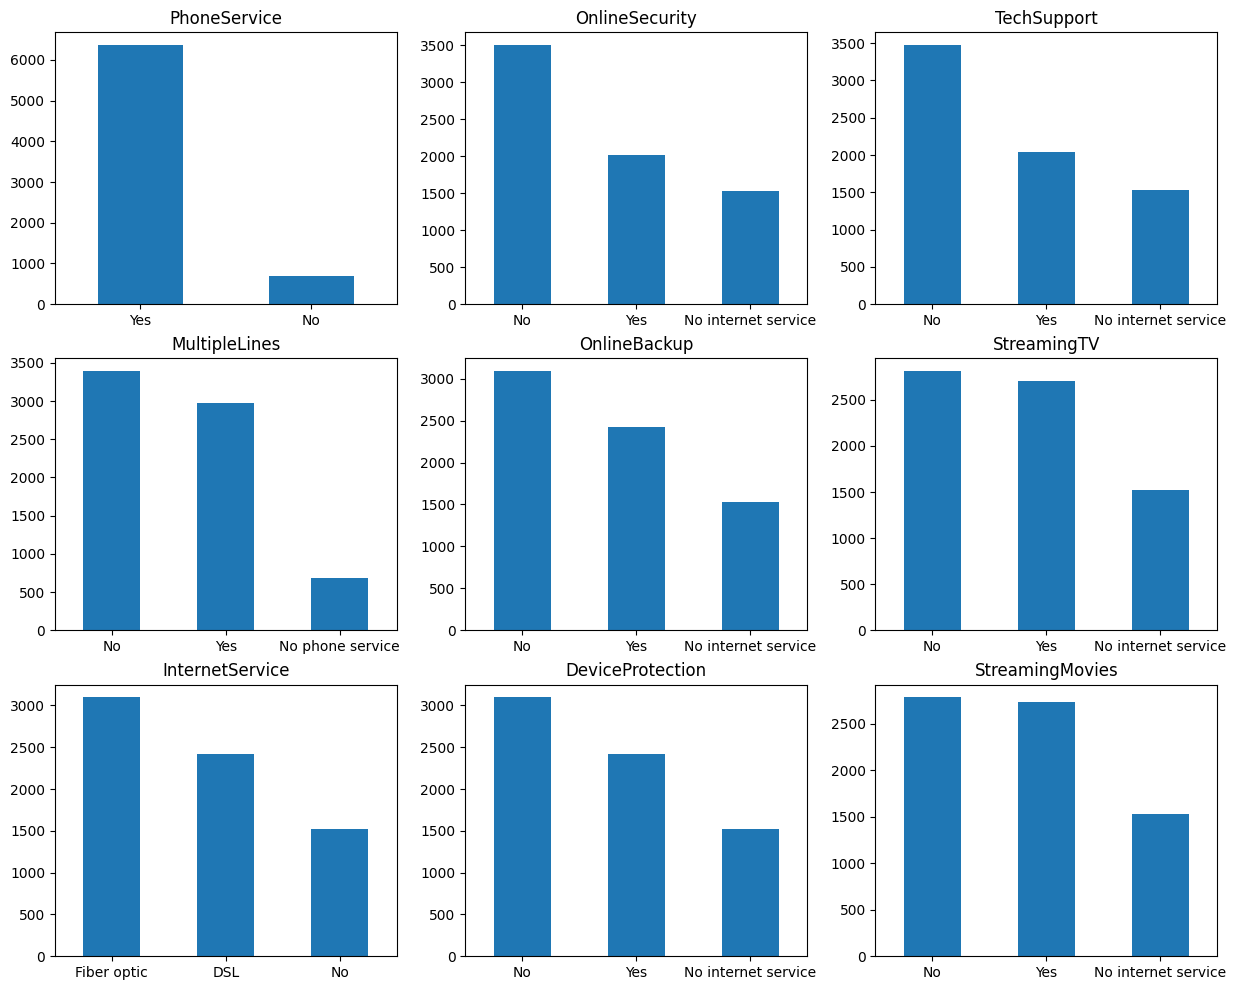

In [26]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

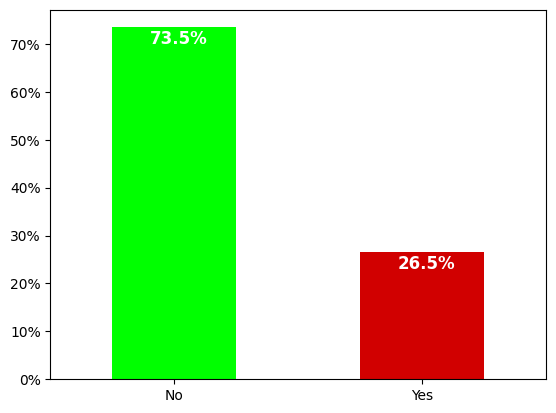

In [27]:
c = ['#00FF00','#D10000']
axis = (df['Churn'].value_counts() * 100 / df.shape[0]).plot(kind='bar', stacked=True, rot=0, color = c)

axis.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

totals = []

for i in axis.patches:
  totals.append(i.get_width())

total = sum(totals)

for i in axis.patches:
  axis.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn

<Axes: xlabel='Churn', ylabel='tenure'>

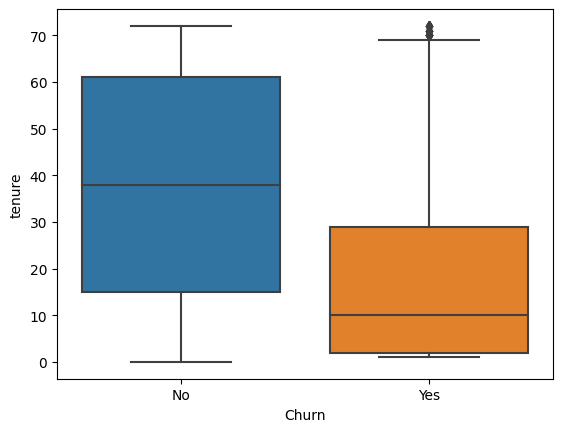

In [28]:
sns.boxplot(x = df.Churn, y = df.tenure)

the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

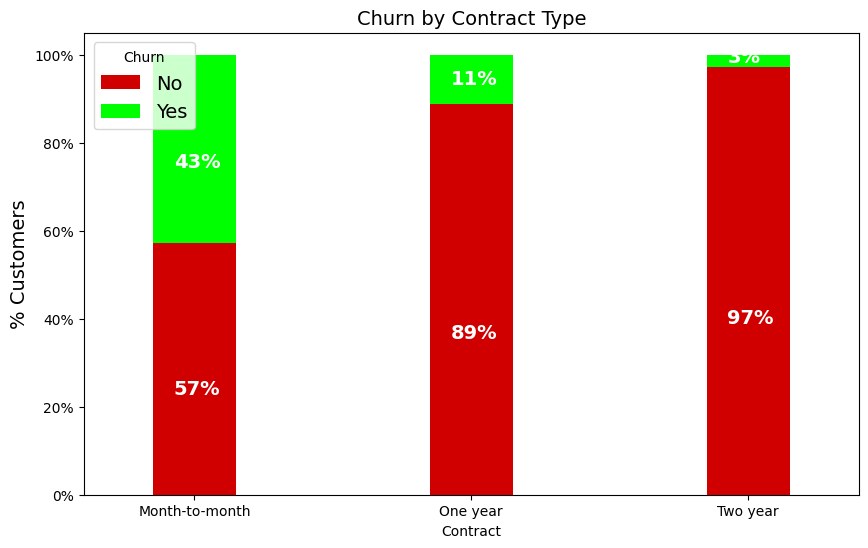

In [29]:
c = ['#00FF00','#D10000']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Confirmation: the customers who have a month to month contract have a very high churn rate.

<ipython-input-30-8ed07f198b85>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
<ipython-input-30-8ed07f198b85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

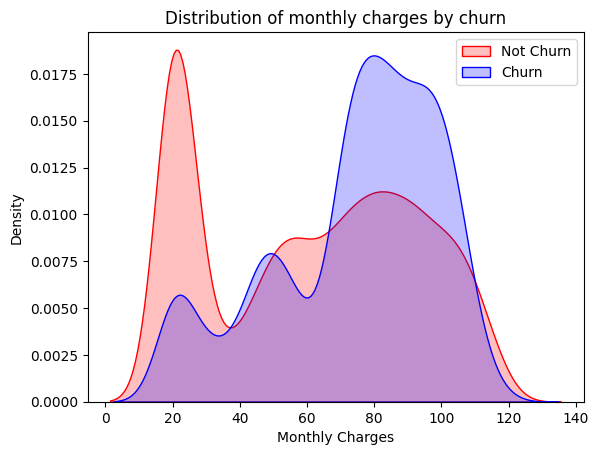

In [30]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Higher % of customers churn when the monthly charges are high.

In [31]:
X = df2.drop(['Churn', 'gender', 'customerID'], axis=1)
y = df2[['Churn']]

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7032 non-null   object 
 8   MultipleLines_No                         7043 non-null   uint8  
 9   MultipleLines_No phone service           7043 non-null   uint8  
 10  MultipleLines_Yes                        7043 no

In [33]:
# Por padrão a divisão de teste é setada para 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
X_train['TotalCharges'].median()
X_test['TotalCharges'].median()

1399.5749999999998

In [35]:
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['TotalCharges'].median())
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(X_test['TotalCharges'].median())

In [36]:
X_train['TotalCharges'] = X_train['TotalCharges'].astype(dtype='float64')
X_test['TotalCharges'] = X_test['TotalCharges'].astype(dtype='float64')

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 647 to 5064
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5282 non-null   int64  
 1   Partner                                  5282 non-null   int64  
 2   Dependents                               5282 non-null   int64  
 3   tenure                                   5282 non-null   int64  
 4   PhoneService                             5282 non-null   int64  
 5   PaperlessBilling                         5282 non-null   int64  
 6   MonthlyCharges                           5282 non-null   float64
 7   TotalCharges                             5282 non-null   float64
 8   MultipleLines_No                         5282 non-null   uint8  
 9   MultipleLines_No phone service           5282 non-null   uint8  
 10  MultipleLines_Yes                        5282 

- Realizar normalização neste ponto

In [38]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convertendo os dados normalizados em DataFrame para que seja possível utilizá-los na função de cross validation
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X.columns)

# X_train_normalized = scaler.fit_transform(X_train)
# X_test_normalized = scaler.fit_transform(X_test)

- Instanciar os modelos que encaixam com o tipo de problema e passar todos eles na função para ver qual performa melhor


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier

model_lr = LogisticRegression()
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svm = svm.SVC()
model_hgb = HistGradientBoostingClassifier()

Criando uma função de validação cruzada apenas para verificar se é válido o balanceamento, caso o balanceamento implique em uma melhora do modelo, aplicá-lo no modelo

In [40]:
# Realizando as importações dos métodos que serão utilizados na função
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Criando a função de validação cruzada
def validacao_cruzada(modelo, X, y, oversampling=False):

  Kfold = KFold(n_splits=5)

  # Lista de acuracia para cada split (5)
  acuracias_split = []

  for idx, (idx_treino, idx_validacao) in enumerate(Kfold.split(X)):
    # X_split_treino = X.iloc[idx_treino, :]
    # y_split_treino = y.iloc[idx_treino, :]
    X_split_treino = X.iloc[idx_treino, :]
    y_split_treino = y.iloc[idx_treino, :]

    # Realizando Oversampling (apenas no split de treino)
    if oversampling:
      smote = SMOTE(random_state=20)
      X_split_treino, y_split_treino = smote.fit_resample(X_split_treino, y_split_treino)

  # Treinando o modelo com os dados (DE TREINO) balanceados
    modelo.fit(X_split_treino, y_split_treino.values.flatten())

    # X_split_validacao = X.iloc[idx_validacao, :]
    # y_split_validacao = y.iloc[idx_validacao, :]
    X_split_validacao = X.iloc[idx_validacao, :]
    y_split_validacao = y.iloc[idx_validacao, :]

    # Realizando a validação SEM oversampling
    # Amostra do mundo real, ou seja, com dados desbalanceados
    predict_validacao = modelo.predict(X_split_validacao)

    acuracia_split = accuracy_score(y_split_validacao, predict_validacao)

    acuracias_split.append(acuracia_split)

    print(f"Acuracia do split {idx}: {acuracia_split}")

  return acuracias_split

In [41]:
# Inserir os códigos abaixo em um loop quando possível

In [42]:
media_acuracia_model_lr_sem_smote = mean(validacao_cruzada(model_lr, X_train_normalized_df, y_train, oversampling=False)) * 100

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Acuracia do split 0: 0.7852412488174078
Acuracia do split 1: 0.815515610217597
Acuracia do split 2: 0.8011363636363636
Acuracia do split 3: 0.8200757575757576
Acuracia do split 4: 0.7916666666666666


In [43]:
media_acuracia_model_dtc_sem_smote = mean(validacao_cruzada(model_dtc, X_train_normalized_df, y_train, oversampling=False)) * 100

Acuracia do split 0: 0.6868495742667928
Acuracia do split 1: 0.7445600756859035
Acuracia do split 2: 0.7206439393939394
Acuracia do split 3: 0.7234848484848485
Acuracia do split 4: 0.7111742424242424


In [44]:
media_acuracia_model_rfc_sem_smote = mean(validacao_cruzada(model_rfc, X_train_normalized_df, y_train, oversampling=False)) * 100

Acuracia do split 0: 0.7691579943235572
Acuracia do split 1: 0.8003784295175024
Acuracia do split 2: 0.7850378787878788
Acuracia do split 3: 0.790719696969697
Acuracia do split 4: 0.7708333333333334


In [45]:
media_acuracia_model_xgb_sem_smote = mean(validacao_cruzada(model_xgb, X_train_normalized_df, y_train, oversampling=False)) * 100

Acuracia do split 0: 0.7521286660359509
Acuracia do split 1: 0.7899716177861873
Acuracia do split 2: 0.7755681818181818
Acuracia do split 3: 0.8011363636363636
Acuracia do split 4: 0.7623106060606061


In [46]:
media_acuracia_model_svm_sem_smote = mean(validacao_cruzada(model_svm, X_train_normalized_df, y_train, oversampling=False)) * 100

Acuracia do split 0: 0.7767265846736046
Acuracia do split 1: 0.8022705771050141
Acuracia do split 2: 0.7964015151515151
Acuracia do split 3: 0.8096590909090909
Acuracia do split 4: 0.7850378787878788


In [47]:
media_acuracia_model_hgb_sem_smote = mean(validacao_cruzada(model_hgb, X_train_normalized_df, y_train, oversampling=False)) * 100

Acuracia do split 0: 0.7757805108798487
Acuracia do split 1: 0.8051087984862819
Acuracia do split 2: 0.7850378787878788
Acuracia do split 3: 0.8020833333333334
Acuracia do split 4: 0.7727272727272727


In [48]:
# Cross validation com smote

In [49]:
media_acuracia_model_lr_com_smote = mean(validacao_cruzada(model_lr, X_train_normalized_df, y_train, oversampling=True)) * 100

Acuracia do split 0: 0.7473982970671712
Acuracia do split 1: 0.771996215704825
Acuracia do split 2: 0.7348484848484849
Acuracia do split 3: 0.7537878787878788
Acuracia do split 4: 0.7518939393939394


In [50]:
media_acuracia_model_dtc_com_smote = mean(validacao_cruzada(model_dtc, X_train_normalized_df, y_train, oversampling=True)) * 100

Acuracia do split 0: 0.7303689687795648
Acuracia do split 1: 0.7294228949858089
Acuracia do split 2: 0.7130681818181818
Acuracia do split 3: 0.7528409090909091
Acuracia do split 4: 0.7102272727272727


In [51]:
media_acuracia_model_rfc_com_smote = mean(validacao_cruzada(model_rfc, X_train_normalized_df, y_train, oversampling=True)) * 100

Acuracia do split 0: 0.771050141911069
Acuracia do split 1: 0.7842951750236519
Acuracia do split 2: 0.7613636363636364
Acuracia do split 3: 0.7954545454545454
Acuracia do split 4: 0.7566287878787878


In [52]:
media_acuracia_model_xgb_com_smote = mean(validacao_cruzada(model_xgb, X_train_normalized_df, y_train, oversampling=True)) * 100

Acuracia do split 0: 0.7701040681173131
Acuracia do split 1: 0.7956480605487228
Acuracia do split 2: 0.7727272727272727
Acuracia do split 3: 0.7926136363636364
Acuracia do split 4: 0.7651515151515151


In [53]:
media_acuracia_model_svm_com_smote = mean(validacao_cruzada(model_svm, X_train_normalized_df, y_train, oversampling=True)) * 100

Acuracia do split 0: 0.7644276253547777
Acuracia do split 1: 0.7729422894985809
Acuracia do split 2: 0.7528409090909091
Acuracia do split 3: 0.7755681818181818
Acuracia do split 4: 0.7386363636363636


In [54]:
media_acuracia_model_hgb_com_smote = mean(validacao_cruzada(model_hgb, X_train_normalized_df, y_train, oversampling=True)) * 100

Acuracia do split 0: 0.7682119205298014
Acuracia do split 1: 0.7984862819299905
Acuracia do split 2: 0.7765151515151515
Acuracia do split 3: 0.8077651515151515
Acuracia do split 4: 0.7689393939393939


Visualizando as médias das acurácias sem smote vs com smote para cada modelo testado

In [55]:
# Logistic Regression

In [56]:
media_acuracia_model_lr_sem_smote

80.27271293827584

In [57]:
media_acuracia_model_lr_com_smote

75.19849631604598

In [58]:
# Decision Tree Classifier

In [59]:
media_acuracia_model_dtc_sem_smote

71.73425360511455

In [60]:
media_acuracia_model_dtc_com_smote

72.71856454803475

In [61]:
# Random Forest Classifier

In [62]:
media_acuracia_model_rfc_sem_smote

78.32254665863938

In [63]:
media_acuracia_model_rfc_com_smote

77.3758457326338

In [64]:
# XG Boost

In [65]:
media_acuracia_model_xgb_sem_smote

77.62230870674578

In [66]:
media_acuracia_model_xgb_com_smote

77.9248910581692

In [67]:
# SVM

In [68]:
media_acuracia_model_svm_com_smote

76.08830738797626

In [69]:
media_acuracia_model_svm_com_smote

76.08830738797626

In [70]:
# HistGradientBoostingClassifier

In [71]:
media_acuracia_model_hgb_sem_smote

78.81475588429231

In [72]:
media_acuracia_model_hgb_com_smote

78.39835798858978

- Selecionar o modelo que melhor performou na função de validação cruzada (com ou sem oversampling) -> Avaliar entre o *modelo de Regressão Logística* e o *modelo HGB* e verificar qual deles performa melhor com os hiperparametros tunados. Vale assistir parte do vídeo (https://youtu.be/CWxaXyXZ-1A?si=fA1Df8RwBIHL091b) onde é mostrada uma validação cruzada para verificar o melhor modelo (tentar fazer essa validação na mão com uma função ou então usando um pipeline)
- Tunar os hiperparametros do modelo (https://www.youtube.com/watch?v=oK-8tLgLZ2Q)
- Possiveis hiperparametros para o algoritmo de regressão logistica: solver: liblinear; lbfgs; newton-cholesky / max_iter: 50, 100, 150, 200 / penalty: None, l1, l2, elasticnet / class-weight: None, balanced
- Possiveis hiperparametros para o algoritmo HGB: verbose: 0, 1 / max_iter: 50, 100, 150, 200, 250 / max_depth: 5, 10, 15, 20, 30, None / class-weight: None, balanced
- Se necessário (caso a performance tenha sido melhor com o oversampling), aplicar o balanceamento nos dados de treino, caso contrário, manter o balanceamento atual


Se possível, inserir dentro de um pipeline

repositorio para validar a formula (https://github.com/letsdata/oversampling/blob/main/Classes%20Desbalanceadas.ipynb)

In [73]:
# importação do Randomized Search
from sklearn.model_selection import RandomizedSearchCV

In [74]:
# Como o y_train está formatado como DataFrame, estou utilizando o método ravel() em seus valores para que possa ser
# ajustado e encaixado corretamente no RandomizedSearchCV. Fiz esta transformação após a função de cross validation
# de balanceamento, pois a mesma utiliza métodos que só funcionam com dataframes, como o iloc, por exemplo.
y_train = y_train.values.ravel()

In [75]:
# Realizando tunagem de hiperparametros para o modelo de regressao logistica

params_lr = { "C": [0.01, 0.1, 1, 10],
          "solver": ['liblinear', 'lbfgs', 'newton-cholesky'],
          "max_iter": [50,100,150,200],
          "penalty": ["l1", "l2"],
          "class_weight": [None, "balanced"]
          }

lr_rand = RandomizedSearchCV(model_lr, params_lr, n_iter=32, scoring="accuracy", verbose=True, cv=5, n_jobs=-1, random_state=2)

lr_rand.fit(X_train_normalized, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=32, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [50, 100, 150, 200],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cholesky']},
                   random_state=2, scoring='accuracy', verbose=True)

In [76]:
print("Melhores Hiperparâmetros:")
print(lr_rand.best_params_)

Melhores Hiperparâmetros:
{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 150, 'class_weight': None, 'C': 10}


In [77]:
print(f"Acuracia Random Search CV LR: {lr_rand.best_score_}")

Acuracia Random Search CV LR: 0.8044311372953757


In [78]:
# Realizando tunagem de hiperparametros para o modelo HGB

params_hgb = {"verbose": [0, 1],

          "learning_rate": [0.01, 0.1, 0.3],
          "l2_regularization": [0.0, 1.0, 2.0],
          "max_iter": [50,100,150,200, 250],
          "max_depth": [None, 5, 10, 15, 20, 30],
          "min_samples_leaf": [1, 2, 4,7],
          "class_weight": [None, "balanced"]
          }

hgb_rand = RandomizedSearchCV(model_hgb, params_hgb, n_iter=32, scoring="accuracy", verbose=True, cv=5, n_jobs=-1, random_state=2)

hgb_rand.fit(X_train_normalized, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Binning 0.002 GB of training data: 0.015 s
Fitting gradient boosted rounds:
[1/200] 1 tree, 31 leaves, max depth = 8, in 0.012s
[2/200] 1 tree, 31 leaves, max depth = 7, in 0.011s
[3/200] 1 tree, 31 leaves, max depth = 7, in 0.014s
[4/200] 1 tree, 31 leaves, max depth = 8, in 0.012s
[5/200] 1 tree, 31 leaves, max depth = 7, in 0.012s
[6/200] 1 tree, 31 leaves, max depth = 7, in 0.012s
[7/200] 1 tree, 31 leaves, max depth = 8, in 0.012s
[8/200] 1 tree, 31 leaves, max depth = 11, in 0.012s
[9/200] 1 tree, 31 leaves, max depth = 9, in 0.012s
[10/200] 1 tree, 31 leaves, max depth = 9, in 0.012s
[11/200] 1 tree, 31 leaves, max depth = 9, in 0.012s
[12/200] 1 tree, 31 leaves, max depth = 7, in 0.011s
[13/200] 1 tree, 31 leaves, max depth = 9, in 0.012s
[14/200] 1 tree, 31 leaves, max depth = 9, in 0.012s
[15/200] 1 tree, 31 leaves, max depth = 8, in 0.012s
[16/200] 1 tree, 31 leaves, max depth = 8, in 0.012s
[17/200] 1 tree, 31 le

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=32,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'l2_regularization': [0.0, 1.0, 2.0],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [None, 5, 10, 15, 20, 30],
                                        'max_iter': [50, 100, 150, 200, 250],
                                        'min_samples_leaf': [1, 2, 4, 7],
                                        'verbose': [0, 1]},
                   random_state=2, scoring='accuracy', verbose=True)

In [79]:
print("Melhores Hiperparâmetros:")
print(hgb_rand.best_params_)

Melhores Hiperparâmetros:
{'verbose': 1, 'min_samples_leaf': 7, 'max_iter': 200, 'max_depth': None, 'learning_rate': 0.01, 'l2_regularization': 0.0, 'class_weight': None}


In [80]:
print(f"Acuracia Random Search CV HGB: {hgb_rand.best_score_}")

Acuracia Random Search CV HGB: 0.7966704652962932


In [81]:
# if lr_rand.best_score_ > hgb_rand.best_score_:
#   best_model = lr_rand.best_estimator_
# else:
#   best_model = hgb_rand.best_estimator_

In [82]:
# print("Melhor Estimador:")
# print(best_model)

**Após a validação cruzada ficou decidido que o modelo escolhido será LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='liblinear')**

Acuracia Random Search CV LR: 8044311372953757

Model

In [83]:
#modelo escolhido
best_model = LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='liblinear')
# best_model = lr_rand.best_estimator_

In [84]:
result = best_model.fit(X_train_normalized, y_train)

In [85]:
from sklearn import metrics
prediction_test = best_model.predict(X_test_normalized)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8063600227143668


- Avaliar utilizando cálculos de F1_score, entre outros
- Editar a cópia (Cópia de Telecom Churn(Pipeline) - Versão melhorada do notebook.ipynb) deste notebook refatorando o pré-processamento de dados em um pipeline de dados e inserindo as outras opções de avaliações (como dito na primeira linha desta célula)

Exemplo de vídeos para iniciar a etapa de pipeline:

- https://www.youtube.com/live/wdnbxrPqbO0?si=_k9jE11Kf3XDar9-
- https://www.youtube.com/live/tAohrE-ot28?si=LMU2whzEHSFDLugP

Vídeos para ver sobre hiperparametros (caso haja necessidade de modificar algo na etapa de tunagem):

- https://www.youtube.com/live/03HZpVzARWU?si=Po6cni4cGw3cEBkb

Salvando o modelo em arquivo .pkl

In [86]:
import pickle

melhor_modelo = best_model

# Este modelo salvo está tunado da seguinte forma: LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='liblinear')
with open('modelo.pkl', 'wb') as arquivo:
    pickle.dump(melhor_modelo, arquivo)

In [89]:
import joblib

model = best_model

joblib.dump(model, 'model.joblib')

['model.joblib']

In [87]:
# To get the weights of all the variables (feature importance)
#weights = pd.Series(model.coef_[0],
                 #index=X.columns.values)
#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [88]:
#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))